## 一、获取并处理数据得到时间序列

In [4]:
import numpy as np
import pandas as pd
import tushare as ts

ts.set_token('094f15d71394516b730602faa77b1c708007b8d05df300590b4445ed')
pro = ts.pro_api()
# 多元化银行
diverse_bank_list = ['000001.SZ','600000.SH','600015.SH','600016.SH','600036.SH','601166.SH',
                     '601288.SH','601328.SH','601398.SH','601818.SH',
                     '601939.SH','601988.SH','601998.SH']
# 区域性银行
regional_bank_list = ['002142.SZ','002807.SZ','002839.SZ','002936.SZ','002948.SZ','002958.SZ',
                      '002966.SZ','600908.SH','600919.SH','600926.SH','600928.SH','601009.SH',
                      '601077.SH','601128.SH','601169.SH','601229.SH','601577.SH','601838.SH',
                      '601860.SH','601997.SH','603323.SH']
# df_1 = pro.daily(ts_code='000001.SZ', start_date='20190101', end_date='20191231')
# df_1.head()



def get_stock(name, start_date, end_date, N_amount=1):
    '''
    日交易额单位：千元（日成交额是否需要改变单位？）
    
    
    
    Args:
        name: stock name
        start_date: trade start date
        end_date: trade end date
        N_amount: 成交额的单位 
    
    '''
    df = pro.daily(ts_code=name, start_date=start_date, end_date=end_date)
    df['yield_rate'] = df['change']/df['pre_close']
    df['abs_yield_rate'] = abs(np.log(df['close']/df['pre_close']))
    df['amihud'] = df['abs_yield_rate']/(df['amount']/N_amount)
    return df



def process_stock(name, df):
    df = df[['trade_date','yield_rate','amihud']]
    df.rename(columns={'yield_rate':'yield_rate_'+name, 'amihud':'amihud_'+name},inplace=True)
    return df
    
    
    
def create_time_series(stock_list, start_date, end_date, N_amount=1):
    '''
    获取 stock_list 中每只 stock 的 yield rate 以及 amihud 指标并得到时间序列
    
    Args:
    
    '''
    # 先获取第一个
    df = get_stock(stock_list[0], start_date, end_date, N_amount)
    df = process_stock(stock_list[0], df)
    # 将第一个和后面的合并
    for i in range(len(stock_list)-1):
        df_temp = get_stock(stock_list[i+1], start_date, end_date, N_amount)
        df_temp = process_stock(stock_list[i+1], df_temp)
        df = pd.merge(df,df_temp)
    return df

def main():
    # 成交额的单位为百万
    df = create_time_series(diverse_bank_list,'20190101','20191231', 1000)
    return df
    

if __name__ == '__main__':
    df = main()
    ## 改变顺序
    row_list = ['trade_date']
    for name in diverse_bank_list:
        row_list.append('yield_rate_'+name)
    for name in diverse_bank_list:
        row_list.append('amihud_'+name)
    df = df[row_list]
    df.to_csv('stock1.csv', index=False)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
df.index = pd.to_datetime(df.trade_date)
df

,trade_date,yield_rate_000001.SZ,yield_rate_600000.SH,yield_rate_600015.SH,yield_rate_600016.SH,yield_rate_600036.SH,yield_rate_601166.SH,yield_rate_601288.SH,yield_rate_601328.SH,yield_rate_601398.SH,...,amihud_600016.SH,amihud_600036.SH,amihud_601166.SH,amihud_601288.SH,amihud_601328.SH,amihud_601398.SH,amihud_601818.SH,amihud_601939.SH,amihud_601988.SH,amihud_601998.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,20191231,-0.007242,0.002431,0.002614,0.000000,-0.006609,0.002024,-0.008065,-0.001773,-0.001698,...,0.000000,4.692472e-06,0.000002,0.000011,0.000005,0.000002,0.000013,0.000000,0.000020,0.000000
2019-12-30,20191230,-0.003608,0.001623,0.002621,0.006380,-0.000792,-0.010020,-0.002681,0.003559,-0.001695,...,0.000016,4.746218e-07,0.000004,0.000003,0.000007,0.000001,0.000020,0.000003,0.000011,0.000010
2019-12-27,20191227,0.009715,0.002441,0.005270,0.003200,-0.006299,0.000000,0.005391,0.003571,0.006826,...,0.000007,4.611380e-06,0.000000,0.000007,0.000007,0.000009,0.000006,0.000005,0.000008,0.000025
2019-12-26,20191226,0.010429,0.004085,0.005298,0.003210,0.008203,0.010121,0.010899,0.005386,0.005146,...,0.000012,1.122201e-05,0.000015,0.000023,0.000019,0.000010,0.000047,0.000024,0.000025,0.000113
2019-12-25,20191225,-0.006098,-0.003257,-0.005270,-0.004792,-0.005788,-0.007035,-0.002717,-0.001792,-0.005119,...,0.000023,6.526291e-06,0.000009,0.000008,0.000008,0.000011,0.000012,0.000009,0.000012,0.000059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-08,20190108,-0.008214,-0.002004,-0.005369,-0.001736,-0.011755,0.003955,-0.011204,0.003431,-0.007634,...,0.000007,1.738262e-05,0.000011,0.000016,0.000015,0.000013,0.000033,0.000000,0.000020,0.000024
2019-01-07,20190107,-0.001026,0.002008,-0.005340,-0.003460,0.000392,-0.001974,-0.005571,-0.005119,-0.005693,...,0.000009,3.371224e-07,0.000004,0.000007,0.000018,0.000011,0.000000,0.000008,0.000007,0.000042
2019-01-04,20190104,0.050647,0.015291,0.019048,0.019400,0.025322,0.023569,0.014124,0.013841,0.013462,...,0.000040,1.479300e-05,0.000033,0.000019,0.000031,0.000021,0.000069,0.000035,0.000019,0.000167


## 二、Var 向量值回归 amihud 和 yield rate

In [2]:
import numpy as np
import pandas as pd
import tushare as ts
from statsmodels.tsa import stattools
import matplotlib as mpl
import matplotlib.pyplot as plt


ts.set_token('094f15d71394516b730602faa77b1c708007b8d05df300590b4445ed')
pro = ts.pro_api()

# 计算自相关性
# stattools.acf(df.pct_chg, nlags=10)
# 计算偏自相关性
# stattools.pacf(df.pct_chg, nlags=10)



# df_1 = pro.daily(ts_code='000001.SZ', start_date='20190101')
# df_1.index = pd.to_datetime(df_1.trade_date)
# df_1 = df_1.sort_index(ascending=True)
# df_1

df = pd.read_csv('stock1.csv', index_col=0)
df

,yield_rate_000001.SZ,yield_rate_600000.SH,yield_rate_600015.SH,yield_rate_600016.SH,yield_rate_600036.SH,yield_rate_601166.SH,yield_rate_601288.SH,yield_rate_601328.SH,yield_rate_601398.SH,yield_rate_601818.SH,...,amihud_600016.SH,amihud_600036.SH,amihud_601166.SH,amihud_601288.SH,amihud_601328.SH,amihud_601398.SH,amihud_601818.SH,amihud_601939.SH,amihud_601988.SH,amihud_601998.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20191231,-0.007242,0.002431,0.002614,0.000000,-0.006609,0.002024,-0.008065,-0.001773,-0.001698,0.004556,...,0.000000,4.692472e-06,0.000002,0.000011,0.000005,0.000002,0.000013,0.000000,0.000020,0.000000
20191230,-0.003608,0.001623,0.002621,0.006380,-0.000792,-0.010020,-0.002681,0.003559,-0.001695,-0.011261,...,0.000016,4.746218e-07,0.000004,0.000003,0.000007,0.000001,0.000020,0.000003,0.000011,0.000010
20191227,0.009715,0.002441,0.005270,0.003200,-0.006299,0.000000,0.005391,0.003571,0.006826,0.002257,...,0.000007,4.611380e-06,0.000000,0.000007,0.000007,0.000009,0.000006,0.000005,0.000008,0.000025
20191226,0.010429,0.004085,0.005298,0.003210,0.008203,0.010121,0.010899,0.005386,0.005146,0.013730,...,0.000012,1.122201e-05,0.000015,0.000023,0.000019,0.000010,0.000047,0.000024,0.000025,0.000113
20191225,-0.006098,-0.003257,-0.005270,-0.004792,-0.005788,-0.007035,-0.002717,-0.001792,-0.005119,-0.002283,...,0.000023,6.526291e-06,0.000009,0.000008,0.000008,0.000011,0.000012,0.000009,0.000012,0.000059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190108,-0.008214,-0.002004,-0.005369,-0.001736,-0.011755,0.003955,-0.011204,0.003431,-0.007634,-0.005208,...,0.000007,1.738262e-05,0.000011,0.000016,0.000015,0.000013,0.000033,0.000000,0.000020,0.000024
20190107,-0.001026,0.002008,-0.005340,-0.003460,0.000392,-0.001974,-0.005571,-0.005119,-0.005693,0.000000,...,0.000009,3.371224e-07,0.000004,0.000007,0.000018,0.000011,0.000000,0.000008,0.000007,0.000042
20190104,0.050647,0.015291,0.019048,0.019400,0.025322,0.023569,0.014124,0.013841,0.013462,0.024000,...,0.000040,1.479300e-05,0.000033,0.000019,0.000031,0.000021,0.000069,0.000035,0.000019,0.000167


### 2.1 检验变量序列的平稳性

In [3]:
# ADF 检验时间序列的平稳性

import statsmodels.api as sm
import statsmodels.stats.diagnostic

# sm.tsa.stattools.adfuller(df['yield_rate_000001.SZ'])

def judge_percent(test):
    if test:
        if test[0]<=test[4]['1%']:
            return '1%'
        elif test[0]<=test[4]['5%']:
            return '5%'
        elif test[0]<=test[4]['10%']:
            return '10%'
        else:
            return None
    return None


column_list = [column for column in df]
column_test = {}
for column in column_list:
    test = sm.tsa.stattools.adfuller(df[column])
    temp_list = [test[1]]
    temp_list.append(judge_percent(test))
    column_test[column] = temp_list

column_test

{'yield_rate_000001.SZ': [5.298747073166892e-12, '1%'],
 'yield_rate_600000.SH': [2.665878317792005e-27, '1%'],
 'yield_rate_600015.SH': [5.915998749854795e-28, '1%'],
 'yield_rate_600016.SH': [2.370747073703703e-27, '1%'],
 'yield_rate_600036.SH': [1.9809980216697776e-29, '1%'],
 'yield_rate_601166.SH': [3.9638667260576014e-13, '1%'],
 'yield_rate_601288.SH': [1.747227738536033e-29, '1%'],
 'yield_rate_601328.SH': [1.0539370962238551e-28, '1%'],
 'yield_rate_601398.SH': [4.817418650125654e-29, '1%'],
 'yield_rate_601818.SH': [3.421479326385693e-28, '1%'],
 'yield_rate_601939.SH': [6.895166596879135e-28, '1%'],
 'yield_rate_601988.SH': [3.491500304993949e-29, '1%'],
 'yield_rate_601998.SH': [3.8234539499980044e-26, '1%'],
 'amihud_000001.SZ': [0.19233481254144114, None],
 'amihud_600000.SH': [0.1526575842526407, None],
 'amihud_600015.SH': [0.0012084137644636712, '1%'],
 'amihud_600016.SH': [9.029688889585918e-28, '1%'],
 'amihud_600036.SH': [0.0004484830669869233, '1%'],
 'amihud_6011

In [4]:
# 去除不满足 ADF 检验的对应时间序列

test_list_1=[]
test_list_2=[]
def test_column(column_test):
    for i in range(int(len(column_list)/2)):
        if column_test[column_list[i]][1]=='1%' and column_test[column_list[i+int(len(column_list)/2)]][1]=='1%':
            test_list_1.append(column_list[i])
            test_list_2.append(column_list[i+int(len(column_list)/2)])
    return test_list_1+test_list_2

df_1 = df[test_column(column_test)]
df_1

,yield_rate_600015.SH,yield_rate_600016.SH,yield_rate_600036.SH,yield_rate_601288.SH,yield_rate_601398.SH,yield_rate_601818.SH,yield_rate_601939.SH,yield_rate_601988.SH,yield_rate_601998.SH,amihud_600015.SH,amihud_600016.SH,amihud_600036.SH,amihud_601288.SH,amihud_601398.SH,amihud_601818.SH,amihud_601939.SH,amihud_601988.SH,amihud_601998.SH
trade_date,,,,,,,,,,,,,,,,,,
20191231,0.002614,0.000000,-0.006609,-0.008065,-0.001698,0.004556,0.000000,-0.005391,0.000000,0.000016,0.000000,4.692472e-06,0.000011,0.000002,0.000013,0.000000,0.000020,0.000000
20191230,0.002621,0.006380,-0.000792,-0.002681,-0.001695,-0.011261,-0.002759,0.005420,0.001623,0.000014,0.000016,4.746218e-07,0.000003,0.000001,0.000020,0.000003,0.000011,0.000010
20191227,0.005270,0.003200,-0.006299,0.005391,0.006826,0.002257,0.002766,0.002717,0.003257,0.000034,0.000007,4.611380e-06,0.000007,0.000009,0.000006,0.000005,0.000008,0.000025
20191226,0.005298,0.003210,0.008203,0.010899,0.005146,0.013730,0.008368,0.005464,0.006557,0.000062,0.000012,1.122201e-05,0.000023,0.000010,0.000047,0.000024,0.000025,0.000113
20191225,-0.005270,-0.004792,-0.005788,-0.002717,-0.005119,-0.002283,-0.002782,-0.002725,-0.004894,0.000086,0.000023,6.526291e-06,0.000008,0.000011,0.000012,0.000009,0.000012,0.000059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190108,-0.005369,-0.001736,-0.011755,-0.011204,-0.007634,-0.005208,0.000000,-0.008403,0.001845,0.000055,0.000007,1.738262e-05,0.000016,0.000013,0.000033,0.000000,0.000020,0.000024
20190107,-0.005340,-0.003460,0.000392,-0.005571,-0.005693,0.000000,-0.003145,-0.002793,-0.003676,0.000029,0.000009,3.371224e-07,0.000007,0.000011,0.000000,0.000008,0.000007,0.000042
20190104,0.019048,0.019400,0.025322,0.014124,0.013462,0.024000,0.015974,0.008451,0.018727,0.000118,0.000040,1.479300e-05,0.000019,0.000021,0.000069,0.000035,0.000019,0.000167


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from numpy import *
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
import statsmodels.stats.diagnostic
from statsmodels.tsa.api import VAR

mat(eye(11, 11, dtype=int))

matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [5]:
mat(eye(11, 11, dtype=int))[:,9]

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0]])

In [10]:
mat(np.zeros((11,11)))

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### 2.2 模型的参数估计

In [10]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [11]:
dates = mdata[['year','quarter']].astype(int).astype(str)
quarterly = dates['year'] + 'Q' + dates['quarter']

from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

In [12]:
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


In [13]:
model = VAR(data)
results = model.fit(2)
results.summary()

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Oct, 2020
Time:                     21:31:11
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

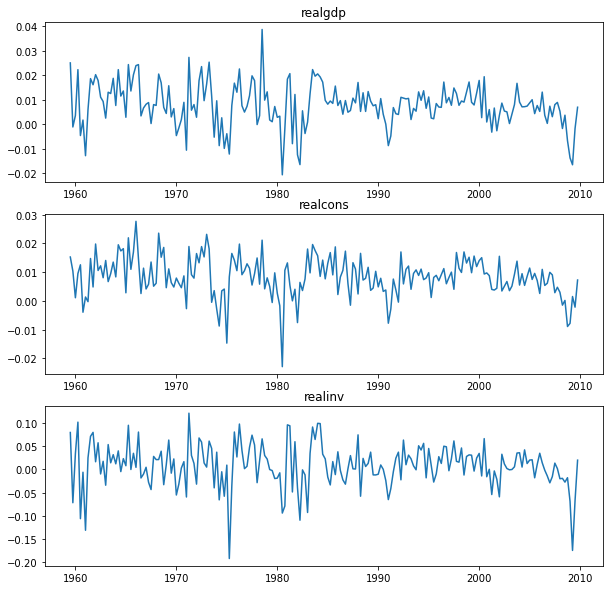

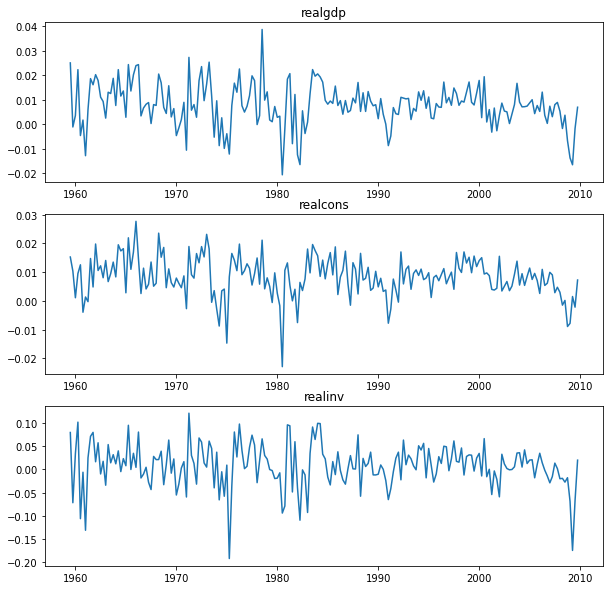

In [14]:
results.plot()

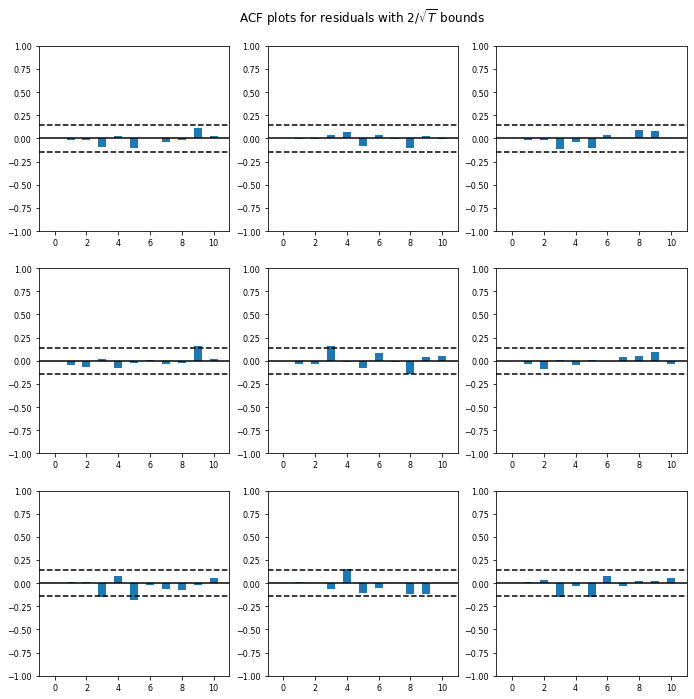

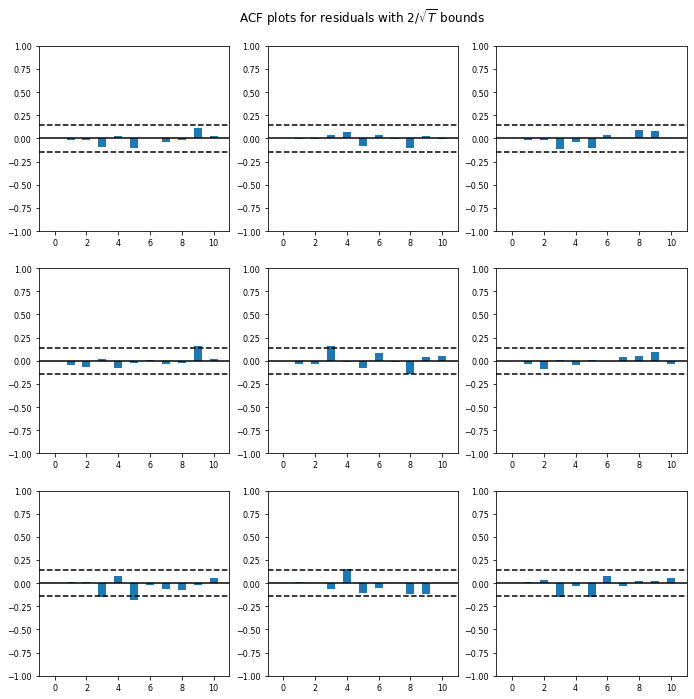

In [15]:
results.plot_acorr()

### 2.3 确定最优的滞后阶数

In [16]:
model.select_order(15)

In [17]:
results = model.fit(maxlags = 15, ic='aic')

In [18]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Oct, 2020
Time:                     23:00:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4257
Nobs:                     199.000    HQIC:                  -27.7212
Log likelihood:           1961.15    FPE:                7.47593e-13
AIC:                     -27.9222    Det(Omega_mle):     6.45336e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001281         0.001295            0.989           0.322
L1.realgdp         -0.286148         0.171582           -1.668           0.095
L1.realcons         0.673869         0.132245            5.096    

### 2.4 Granger 因果检验

In [21]:
results.test_causality('realgdp',['realinv', 'realcons'], kind = 'f')

### 2.5 检验 Var 模型的平稳性

In [ ]:
# 商业银行
# 多元化银行
000001.SZ	平安银行
600000.SH	浦发银行
600015.SH	华夏银行
600016.SH	民生银行
600036.SH	招商银行
601166.SH	兴业银行
601288.SH	农业银行
601328.SH	交通银行
601398.SH	工商银行
# 601658.SH	邮储银行 时间过晚
601818.SH	光大银行
# 601916.SH	浙商银行 时间过晚
601939.SH	建设银行
601988.SH	中国银行
601998.SH	中信银行


# 区域银行
002142.SZ	宁波银行
002807.SZ	江阴银行
002839.SZ	张家港行
002936.SZ	郑州银行
002948.SZ	青岛银行
002958.SZ	青农商行
002966.SZ	苏州银行
600908.SH	无锡银行
600919.SH	江苏银行
600926.SH	杭州银行
600928.SH	西安银行
601009.SH	南京银行
601077.SH	渝农商行
601128.SH	常熟银行
601169.SH	北京银行
601229.SH	上海银行
601577.SH	长沙银行
601838.SH	成都银行
601860.SH	紫金银行
601997.SH	贵阳银行
603323.SH	苏农银行